# A Glimpse of the Olympics' History via Visuals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
import json
import csv
import plotly
import plotly.plotly as py
import seaborn as sns
import plotly.graph_objs as go
import statsmodels.api as sm
import matplotlib.ticker as tick
%matplotlib inline

## Table of Content
-  **Description of Dataset**
-  **Data Preparation**
-  **Topics：**
    1. Historical Trend of Numbers of Female and Male Atheletes
    2. Height/Weight Increase Rates Per 4 years for 5 Sports from 1948 - 2016
    3. Choropleth Map for Athletes' Nationalities
    4. Medal Results
    5. The USA's Strongest Sports


## Description of Dataset

The dataset records the athletes, events and results information from 120 years of Olympic history: from Athens 1896 to Rio 2016.
See: 
https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/home

The purpose of this dataset visulization is to explore that during the passage of time how the degree of participation of Olympic Games changed (both in the trending of total numbers of attending athletes and the trending in countrywise athletes number changes). Also there are medal results plotted to show which countries are strong in earning medals.

## Data Preparation

In [2]:
df = pd.read_csv("athlete_events.csv")

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# Since Summer Olympic is quite different from and much more popular than Winter Olympic, here we only focus on Summers
df = df[df['Season'] != 'Winter']

In [5]:
# Create Dummies for "Medal" Variable: [Gold, Silver, Bronze]
df = df.join(pd.get_dummies(df['Medal']), how='outer')

In [6]:
# Add a "country" column. A json file is used to find the relevant country of NOC.
with open('noc_regions.csv', mode='r') as infile:
    reader = csv.reader(infile)
    with open('noc_regions_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        mydict = {rows[0]:rows[1] for rows in reader}
df['country'] = df['NOC'].map(mydict)

## Topics

### 1. Historical Trend of Numbers of Female and Male Atheletes

In [7]:
# Create "df2" for ploting the line graph.
df['male'] = [1 if x == 'M' else 0 for x in df['Sex'] ]
df['female'] = [1 if x != 'M' else 0 for x in df['Sex'] ]
df2 = df.groupby(['Year'],as_index=False)['male', 'female'].sum()
df2['total'] = df2['male'] + df2['female']

In [8]:
# Create year name abbreviation for xticks in the following line graph. 
year = df2['Year']
year_abbr = [None]*len(year)
for i in range(2,len(year)):
    year_abbr[i] = "'" + str(year[i])[2:]
year_abbr[0] = '1896'
year_abbr[1] = '1900'
year_abbr[24] = '2000'

In [9]:
# Create a function that transform large numbers into more readable fashion: e.g., 10000 -> 10K.
def tick_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val / 1000000)
        return '{:d}M'.format(val)
    elif tick_val >= 1000:
        val = int(tick_val / 1000)
        return '{:d}K'.format(val)
    else:
        return int(tick_val)

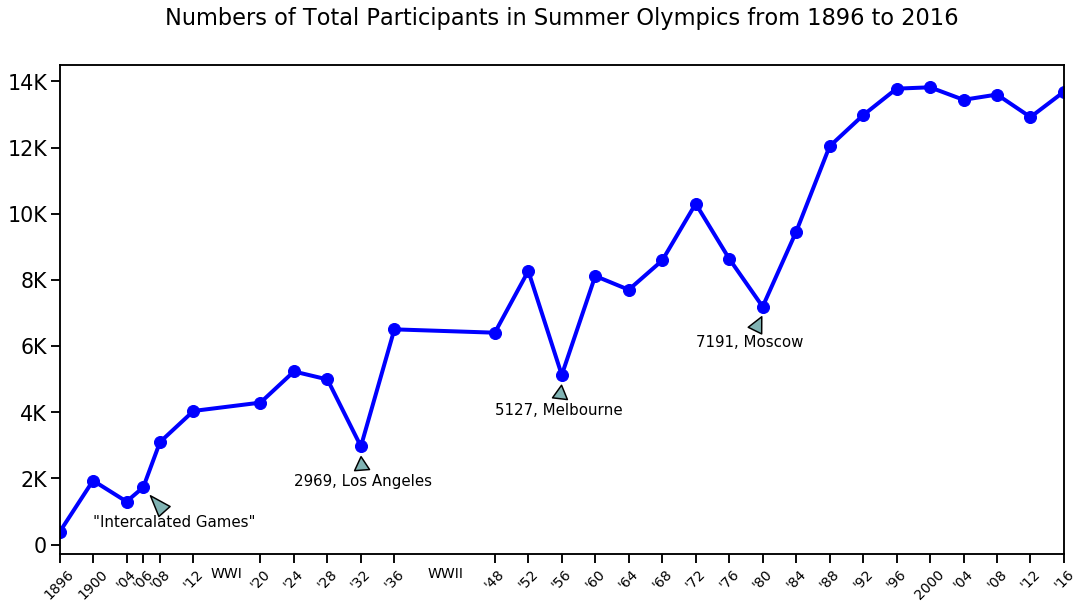

In [10]:
# Plot a line graph showing the trend of numbers of total Participants from 1896 to 2016.
sns.set_context("talk", font_scale=1.25)
fig, ax = plt.subplots(figsize=(18,9))
plt.plot( 'Year', 'total', data=df2, marker='o', markerfacecolor='blue', markersize=12, color='blue', linewidth=4)
plt.xlim(1896, 2016)
plt.xticks(year, year_abbr, rotation=45, fontsize=14)
plt.title('Numbers of Total Participants in Summer Olympics from 1896 to 2016', y=1.07)
# Annotate the year athletes dramatically dropped with number of male athletes and host city.
ax.annotate('2969, Los Angeles', xy=(df2['Year'][9],df2['total'][9]-250),xytext=(df2['Year'][9]-8,
            df2['total'][9]-1200), fontsize=15, arrowprops=dict(arrowstyle="wedge,tail_width=1.", fc=(.5, 0.7, 0.7)))
ax.annotate('5127, Melbourne', xy=(df2['Year'][13],df2['total'][13]-250), xytext=(df2['Year'][13]-8,
            df2['total'][13]-1200), fontsize=15, arrowprops=dict(arrowstyle="wedge,tail_width=1.", fc=(.5, 0.7, 0.7)))
ax.annotate('7191, Moscow', xy=(df2['Year'][19],df2['total'][19]-250), xytext=(df2['Year'][19]-8,
            df2['total'][19]-1200), fontsize=15, arrowprops=dict(arrowstyle="wedge,tail_width=1.", fc=(.5, 0.7, 0.7)))
# Annotate the World Wars.
ax.annotate('WWI', xy=(1900, 0), xytext=(df2['Year'][6]-6,-1000), fontsize=14)
ax.annotate('WWII', xy=(1900, 0), xytext=(df2['Year'][11]-8, -1000), fontsize=14)
# Annotate the "Intercalated Games".
ax.annotate('"Intercalated Games"', xy=(df2['Year'][3]+.7,df2['male'][3]-200),xytext=(df2['Year'][3]-6,
            df2['total'][3]-1200), fontsize=15, arrowprops=dict(arrowstyle="wedge,tail_width=1.", fc=(.5, 0.7, 0.7)))
# Change the yticks using function just built.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(tick_fmt));

Nothing compares to the line graph when revealing some certain trends. So here the line graph is used to give a quick look how number of participants changed since the first Olympics. Though it's a simple line graph, we can tell a lot of stories from it: 
-  First, in 1906 an "Intercalated Games" was held and seen as a compromise between the Greeks and Pierre de Coubertin, the founder of the International Olympic Committee. This was the first and last "Intercalated Games" that was scheduled in between every offcial Summer Olympics. 
-  Second, there are multiple "missing years" during the first half of 20th centure due to WWI and WWII.
-  Third, the 1932 Los Angeles Olympics had a decline in participants number due to the Great Depression. And Los Angeles was far away from that time's center of the World, the Europe. It's the same when 1956 Melbourne Olympics was first held in the Oceania far away from other parts of the world. In 1980 the Soviet Union just invaded Afghanistan so many western countries refused to attend the Moscow Olympics.

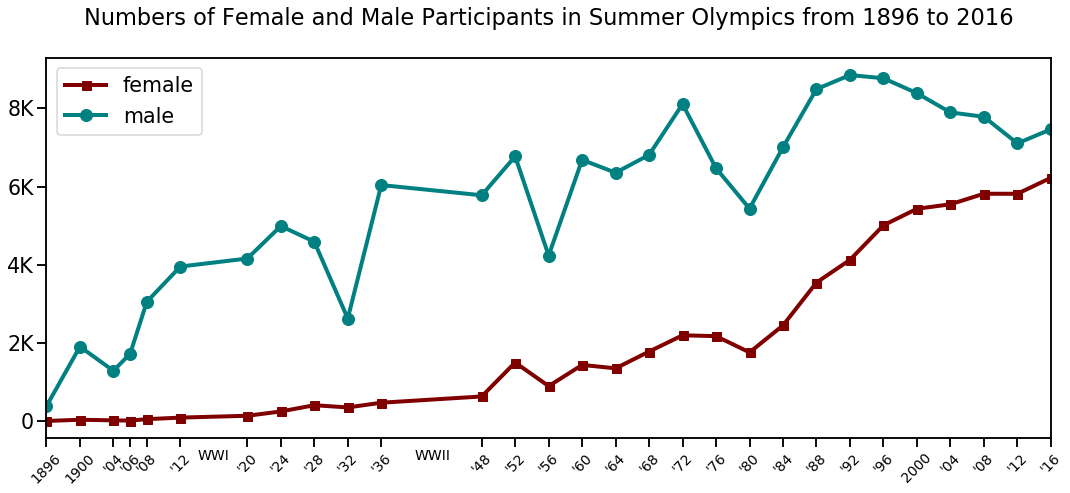

In [11]:
# Plot a line graph showing the trend of numbers of female and male Participants from 1896 to 2016.
sns.set_context("talk", font_scale=1.25)
fig, ax = plt.subplots(figsize=(18,7))
plt.plot( 'Year', 'female', data=df2, marker='s', color='maroon', linewidth=4)
plt.plot( 'Year', 'male', data=df2, marker='o', markerfacecolor='teal', markersize=12, color='teal', linewidth=4)
plt.xlim(1896, 2016)
plt.xticks(year, year_abbr, rotation=45, fontsize=14)
plt.legend()
plt.title('Numbers of Female and Male Participants in Summer Olympics from 1896 to 2016', y=1.07)
# Annotate the World Wars.
ax.annotate('WWI', xy=(1900, 0), xytext=(df2['Year'][6]-6,-1000), fontsize=14)
ax.annotate('WWII', xy=(1900, 0), xytext=(df2['Year'][11]-8, -1000), fontsize=14)
#Change the yticks using function just built.
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(tick_fmt));

The growing population of female Olympics atheletes witnessed the rise of women in sports as well as in other aspects during the modern era after WWII.

###  2. Height/Weight Increase Rates Per 4 years for 5 Sports from 1948 - 2016

Choosing year 1948 is because it's the first modern era Olympic after WWII and I want to focus on how modern Olympics changed historically. Before WWII the Olympics are quite different from now whether in sport events or demographics.

In [12]:
# Find the sports that were included in every Olympic Games from 1948-2016.
sports = df[df['Year']==[1948]]['Sport'].unique()
for i in range(0, len(year[year>1948])):
    new_sports = df[df['Year']==year[i]]['Sport'].unique()
    sports = set(sports).intersection(new_sports)
sports = list(sports)
sports

['Gymnastics', 'Swimming', 'Athletics', 'Fencing', 'Cycling']

In [13]:
# Create the subset for these 5 sports and remove the duplicated athletes' rows.
df0 = df[(df['Year']>=1948) & (df['Sport'].isin(sports))]
df0 = df0.drop_duplicates(subset=['ID'], keep="last")

Run simple linear regressions that set 'y=height, x=year' or 'y=weight, x=year' for each sport.
E.g., for the sport "Swimming", the 'y' would be the heights of swimmers of each Olympic Games from 1948 to 2016, e.g., y = 163 or y=165 and the 'x' would be the number of year, e.g., x = 1956 or x = 2004.

In [14]:
# Run simple linear regressions that set 'y=height, x=year' or 'y=weight, x=year' for each sport.
#E.g., for the sport "Swimming", the 'y' would be the heights of swimmers of each Olympic Games from 1948 to 2016. 
#E.g., y = 178 or y=170 and the 'x' would be the number of year, x = 2000 or x = 2004.
# Create dataset 'swim' to have a look on 'x' and 'y', the missing values are ignored during the regressions.
swim = df0[df0['Sport']=='Swimming']
swim[['Height', 'Weight', 'Year']].head()

,Height,Weight,Year
29,NaN,NaN,1952
104,194.0,78.0,2000
166,178.0,76.0,2000
244,170.0,70.0,2004
258,182.0,76.0,2008


In [15]:
# Run the regressions sport by sport.
height_params=[]
weight_params=[]
for i in range(0, len(sports)):
    dd = df0[df0['Sport']==sports[i]]
    height_res = sm.OLS(dd['Height'], dd['Year'], missing='drop').fit()
    weight_res = sm.OLS(dd['Weight'], dd['Year'], missing='drop').fit()
    # Extract the coefficients of 'year' variable.
    height_params.append(height_res.params)
    weight_params.append(weight_res.params)
height_params = pd.DataFrame(height_params).rename(columns={'Year': 'height'})
weight_params = pd.DataFrame(weight_params).rename(columns={'Year': 'weight'})

In [16]:
# Multiply the coefficients by 4 to calculate the increase rate of Heights/Weights per 4 years.
params =height_params.join(weight_params)
params ['sport'] = sports
params['height_increase_per4year'] = params['height'] * 4
params['weight_increase_per4year'] = params['weight'] * 4

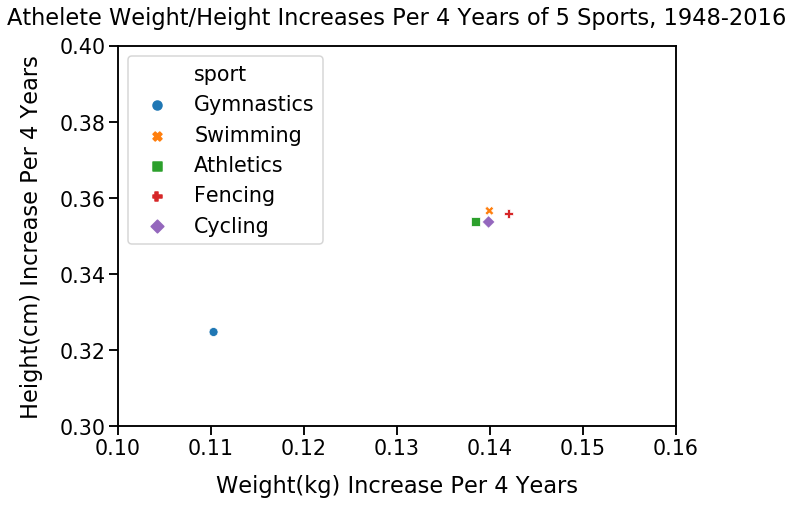

In [17]:
# Plot the coefficients by scattorplot.
f, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x='weight_increase_per4year', y='height_increase_per4year', hue='sport', style='sport', data=params)
plt.xlim(.1,.16)
plt.ylim(.3,.4)
plt.xlabel('Weight(kg) Increase Per 4 Years', labelpad=16)
plt.ylabel('Height(cm) Increase Per 4 Years', labelpad=16)
plt.title('Athelete Weight/Height Increases Per 4 Years of 5 Sports, 1948-2016', y=1.04);

-  The plot of coefficients reveals the trend of increasing Height/Weight of atheletes. E.g., the height/weight of a gymnast increased 0.32 centimeter/0.11 kilograms per 4 years from 1948 to 2016. 
-  To my surprise except the gymnasts other atheletes have quite similar increase rates in Height/Weight, which might be highly correlated to the whole populations Height/Weight increases.
-  I thought gymnasts could take advantages of shorter and lighter body, while the Height/Weight increase rates are not far away from other 4 sports. 

### 3. Choropleth Map for Athletes' Nationalities

In [18]:
# Set user name and API key for using Plotly
plotly.tools.set_credentials_file(username='jliu4', api_key='WVq9VATdeS0Uy06yzvHK')

In [19]:
# Create subset of numbers of athletes per country in 1948.
country_data = df.groupby(['country','NOC','Year'],as_index=False)['ID'].count()
df3 = country_data[country_data['Year']==1948]

In [33]:
# Plot choropleth map by Plotly
data = [ dict(
        type = 'choropleth',
        locations = df3['NOC'],
        z = df3['ID'],
        text = df3['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
                ) 
        ),
        # Adjust Colorbar
        colorbar = dict(
            thickness=12,
            len=.45,
            x=0,
            y=.45,
            autotick = False,
            tickprefix = '',
            title = 'Number of Athletes',
            titleside='bottom'
            )
      ) ]
layout = dict(
    # Use "annotations" instead of "title" to adjust the title location.
    annotations=[
        dict(
            x=0.45,
            y=1,
            text='Olympic Athletes Numbers per Country in 1948',
            showarrow=False,
            font=dict(
                size=25
            )
        )
    ],
    width=1100,
    height=800,
    geo = dict(
        # Show countrylines even the countries do not have values
        showcountries = True,
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)
fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='worldmap')

We can see the 1948 Olympics was mainly a Western Country festival.

In [21]:
# Create subset of numbers of athletes per country in 2016.
df4 = country_data[country_data['Year'] == 2016]

In [22]:
# Plot choropleth map by Plotly
data2 = [ dict(
        type = 'choropleth',
        locations = df4['NOC'],
        z = df4['ID'],
        text = df4['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        # Adjust Colorbar
        colorbar = dict(
            thickness=12,
            len=.45,
            x=0,
            y=.45,
            autotick = False,
            tickprefix = '',
            title = 'Number of Athletes',
            titleside='bottom'
            )
      ) ]
layout2 = dict(
    # Use "annotations" instead of "title" to adjust the title location.
    annotations=[
        dict(
            x=0.45,
            y=1,
            text='Olympic Athletes Numbers per Country in 2016',
            showarrow=False,
            font=dict(
                size=25
            )
        )
    ],
    width=1100,
    height=800,
    geo = dict(
        # Show countrylines even the countries do not have values
        showcountries = True,
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)
fig = dict( data=data2, layout=layout2 )
py.iplot( fig, validate=False, filename='worldmap2')

We can see Asia has improved a lot in participation and involvement. Still, Africa has not many atheletes participating.

###  4. Medal Results

Calculating medals per country is a bit tricky. E.g., a team game can have several gold medal winners, but we want to only count the gold medal once. So here one of the best ways is to drop the duplicated rows based on a subset of "Year", "NOC", "Event", "Gold", "Silver" and "Bronze", and through that we can ensure the uniqueness of medal records. 

In [23]:
# Create subset for medal results.
df5 = df.drop_duplicates(subset=['Year', 'NOC', 'Event', 'Gold', 'Silver', 'Bronze'], keep="last")
medal = df5.groupby(['country', 'NOC', 'Year'], as_index=False)['Gold', 'Silver', 'Bronze'].sum()

In [24]:
# Create a "coutry + gold#" string column for further annotation.
gold = [None]*len(medal)
for i in range(0,len(medal)):
    gold[i] = str(medal['Gold'][i]) + " Gold"
medal['country_gold'] = medal['country'] + ': ' + gold

In [25]:
# We create subset of 1948.
medal_1948 = medal[medal['Year']==1948]
medal_1948 = medal_1948.sort_values(by='Gold').tail(10)

In [26]:
# Create hover text for Plotly.
hover_text = []
for index, row in medal_1948.iterrows():
    hover_text.append(('Gold: {g}<br>'+
                      'Silver: {s}<br>'+
                      'Bronze: {b}<br>').format(g=row['Gold'],
                                            s=row['Silver'],
                                            b=row['Bronze']))
medal_1948['text'] = hover_text  

In [27]:
trace0 = go.Scatter(
    x= medal_1948['Bronze'],
    y= medal_1948['Silver'],
    mode='markers+text',
    text=medal_1948['country_gold'],
    hovertext =medal_1948['text'],
    textfont=dict(
        family='sans serif',
        size=15,
        color='#1f77b4'
    ),
    marker=dict(
        size=medal_1948['Gold'],
        sizemode='area',
        sizeref=2.*max(medal_1948['Gold'])/(120.**2),
        sizemin=2,
        color='rgb(255,215,0)'
    )
)
data3 = [trace0]
layout3 = go.Layout(
    autosize=False,
    width=1000,
    height=700,
    title='<b>Top 10 Gold Winning Country in 1948 London</b>',
    titlefont=dict(
            size=20,
            color='#7f7f7f'
            ),
    xaxis=dict(
        title='Bronze Medal Numbers',
        titlefont=dict(
            size=15,
            ),
        gridcolor='rgb(255, 255, 255)',
        range=[0, 21],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        )
    ),
    yaxis=dict(
        title='Silver Medal Numbers',
        titlefont=dict(
            size=15
            ),
        gridcolor='rgb(255, 255, 255)',
        range=[0, 32],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        )
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    annotations=[
        dict(
            x=5,
            y=27,
            text='<i>*Size of bubbles shows # of Gold Medals</i>',
            showarrow=False,
            font=dict(
                size=14
            )
        )
    ]
)
fig3 = go.Figure(data=data3, layout=layout3)
py.iplot(fig3, filename=r'bubblechart-medal1')

While the USA being no doubt the only "Superpower" in medals, all other countries in the Top 10 are european countries.

In [28]:
# Again we create subset of 2016.
medal_2016 = medal[medal['Year']==2016]
medal_2016 = medal_2016.sort_values(by='Gold').tail(10)

In [29]:
# Create hover text for Plotly.
hover_text2 = []
for index, row in medal_2016.iterrows():
    hover_text2.append(('Gold: {g}<br>'+
                      'Silver: {s}<br>'+
                      'Bronze: {b}<br>').format(g=row['Gold'],
                                            s=row['Silver'],
                                            b=row['Bronze']))
medal_2016['text'] = hover_text2  

In [30]:
# Plot a bubble chart by plotly.
trace1 = go.Scatter(
    x= medal_2016['Bronze'],
    y= medal_2016['Silver'],
    mode='markers+text',
    text=medal_2016['country_gold'],
    hovertext =medal_2016['text'],
    textfont=dict(
        family='sans serif',
        size=15,
        color='#1f77b4'
    ),
    marker=dict(
        size=medal_2016['Gold'],
        sizemode='area',
        sizeref=2.*max(medal_2016['Gold'])/(120.**2),
        sizemin=2,
        color='rgb(255,215,0)'
    )
)
data4 = [trace1]
layout4 = go.Layout(
    autosize=False,
    width=1000,
    height=700,
    title='<b>Top 10 Gold Winning Country in 2016 Rio</b>',
    titlefont=dict(
            size=20,
            color='#7f7f7f'
            ),
    xaxis=dict(
        title='Bronze Medal Numbers',
        titlefont=dict(
            size=15,
            ),
        gridcolor='rgb(255, 255, 255)',
        range=[0, 41],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        )
    ),
    yaxis=dict(
        title='Silver Medal Numbers',
        titlefont=dict(
            size=15
            ),
        gridcolor='rgb(255, 255, 255)',
        range=[0, 43],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        )
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    annotations=[
        dict(
            x=8,
            y=37,
            text='<i>*Size of bubbles shows # of Gold Medals</i>',
            showarrow=False,
            font=dict(
                size=14
            )
        )
    ]
)
fig4 = go.Figure(data=data4, layout=layout4)
py.iplot(fig4, filename='bubblechart-text2')

Still the USA being the only top-tier competitors in medals. But this time, Asian countries and Russia earned significant positions in the chart. That also indicates the involvement of the Olympic Games improved during the years.

### 5. The USA's Strongest Sports

In [31]:
# Create subset of the USA medal info.
medal_US = df5[df5['NOC']=='USA'].groupby(['country', 'Sport'], as_index=False)['Gold', 'Silver', 'Bronze'].sum()
medal_US['total'] =  medal_US['Gold'] + medal_US['Silver'] + medal_US['Bronze']
medal_US = medal_US.sort_values(by='total', ascending=False).head(10)

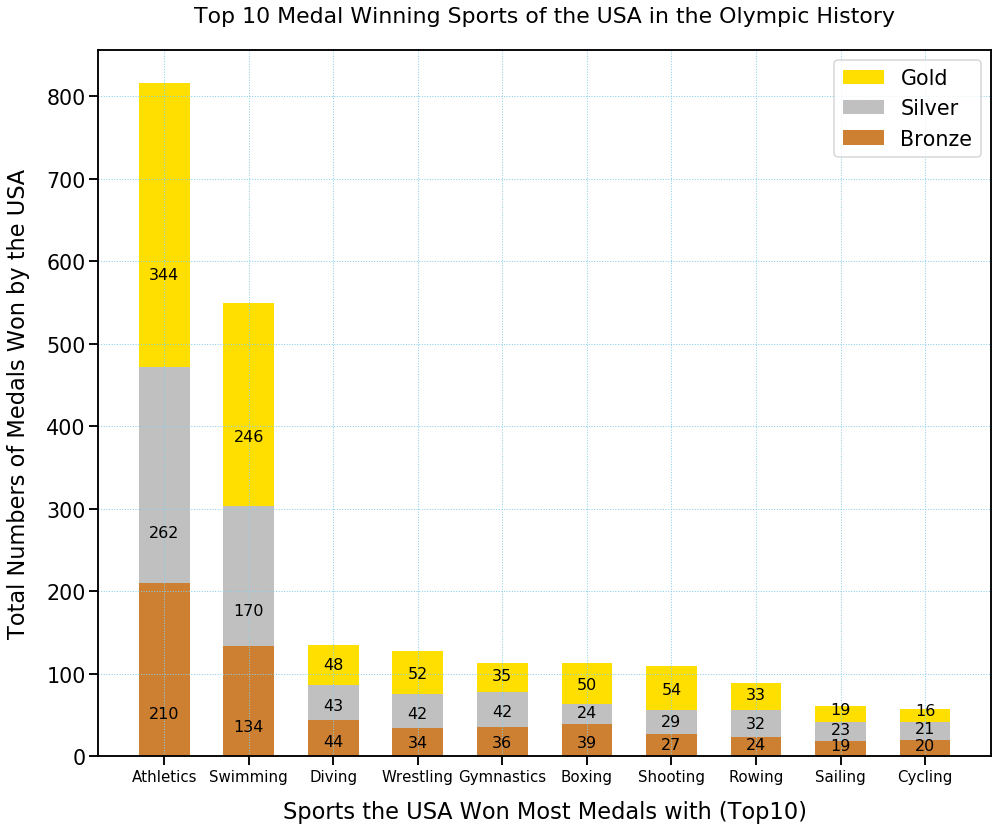

In [32]:
# create list for xticks.
sport = medal_US['Sport']
f, ax = plt.subplots(figsize=(16, 13))
# Plot three stacked bars from bottom to top with the order of "Bronze", "Silver", "Gold".
p1 = plt.bar(sport, medal_US['Bronze'], .6, color='#CD7F32')
p2 = plt.bar(sport, medal_US['Silver'], .6, color='#C0C0C0', bottom=medal_US['Bronze'])
p3 = plt.bar(sport, medal_US['Gold'], .6, color='#FFDF00', bottom=medal_US['Bronze']+medal_US['Silver'])
plt.xlabel('Sports the USA Won Most Medals with (Top10)', labelpad=16)
plt.xticks(fontsize=15)
plt.ylabel('Total Numbers of Medals Won by the USA', labelpad=16)
plt.title('Top 10 Medal Winning Sports of the USA in the Olympic History', y=1.03, fontsize=22)
plt.legend((p3[0],  p2[0], p1[0]), ('Gold', 'Silver', 'Bronze'))
plt.grid(color='skyblue',linestyle='dotted', linewidth=1)
# Define a function that attach a text label within each bar displaying its value.
def autolabel(p1, p2, p3):
    for i in range(0, len(p1)):
        height1 = p1[i].get_height()
        height2 = p2[i].get_height()
        height3 = p3[i].get_height()
        ax.text(p1[i].get_x() + p1[i].get_width()/2., .2*height1,
                '%d' % int(height1),
                ha='center', va='bottom', fontsize=16)
        ax.text(p1[i].get_x() + p1[i].get_width()/2., height1+.2*height2,
                '%d' % int(height2),
                ha='center', va='bottom', fontsize=16)
        ax.text(p1[i].get_x() + p1[i].get_width()/2., height1+height2+.3*height3,
                '%d' % int(height3),
                ha='center', va='bottom', fontsize=16)
autolabel(p1, p2, p3);

Historically, the USA dominates Athletics and Swimming by winning the most total medals and with gold medals way more than silver or bronze. Other sports of the USA seem to lack the overwhelming power of these two sports. One reason might be Athletics and Swimming being two of the sports have the larget numbers of events.  